In [89]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("E:/TAMU/Sem_2/ISEN_619/Project/TrainingData_2015_csv.csv", sep=",")

In [3]:
train = df(train)

In [5]:
df.head(train)

,Time,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I),Power_Avg
0,01-01-15 0:10,8.025,0.504,327.346,1.170,0.062804,0.803112
1,01-01-15 0:20,8.946,0.540,330.198,0.875,0.060362,0.969471
2,01-01-15 0:30,9.147,0.480,334.323,0.876,0.052476,1.000000
3,01-01-15 0:40,8.561,0.673,335.525,0.755,0.078612,0.896077
4,01-01-15 0:50,7.578,0.384,334.049,0.531,0.050673,0.669709


In [4]:
train = train.iloc[:, 1:7]

In [7]:
df.head(train)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I),Power_Avg
0,8.025,0.504,327.346,1.170,0.062804,0.803112
1,8.946,0.540,330.198,0.875,0.060362,0.969471
2,9.147,0.480,334.323,0.876,0.052476,1.000000
3,8.561,0.673,335.525,0.755,0.078612,0.896077
4,7.578,0.384,334.049,0.531,0.050673,0.669709


In [5]:
train_x = train.iloc[:, 0:5]

In [9]:
df.head(train_x)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
0,8.025,0.504,327.346,1.170,0.062804
1,8.946,0.540,330.198,0.875,0.060362
2,9.147,0.480,334.323,0.876,0.052476
3,8.561,0.673,335.525,0.755,0.078612
4,7.578,0.384,334.049,0.531,0.050673


In [6]:
train_x.columns = ['Wind_speed', 'Wind_speed_std', 'Wind_direction', 'Environment_temperature', 'Turbulence_intensity']

In [7]:
train_y = train.iloc[:, 5]

In [8]:
train_y = df(train_y)

In [13]:
df.head(train_y)

,Power_Avg
0,0.803112
1,0.969471
2,1.000000
3,0.896077
4,0.669709


### Split training data 70 - 30

In [25]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(21697, 5) (21697, 1)
(9300, 5) (9300, 1)


### Plots

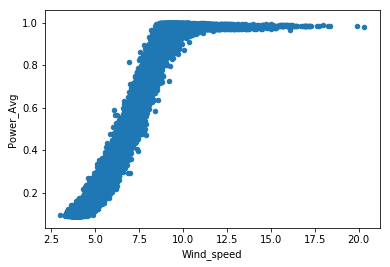

In [14]:
data = pd.concat([train_x['Wind_speed'], train_y['Power_Avg']], axis = 1)
data.plot.scatter(x='Wind_speed', y='Power_Avg')

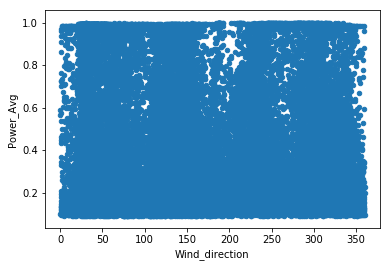

In [15]:
data1 = pd.concat([train_x['Wind_direction'], train_y['Power_Avg']], axis = 1)
data1.plot.scatter(x='Wind_direction', y='Power_Avg')

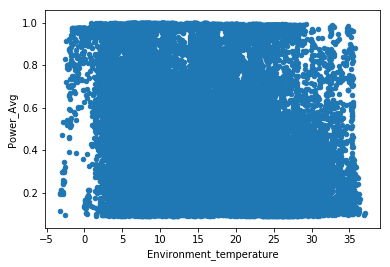

In [16]:
data2 = pd.concat([train_x['Environment_temperature'], train_y['Power_Avg']], axis = 1)
data2.plot.scatter(x='Environment_temperature', y='Power_Avg')

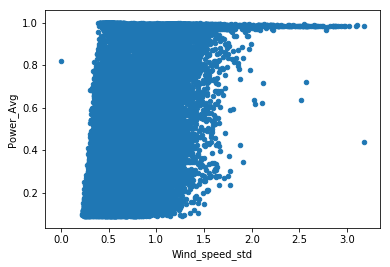

In [17]:
data3 = pd.concat([train_x['Wind_speed_std'], train_y['Power_Avg']], axis = 1)
data3.plot.scatter(x='Wind_speed_std', y='Power_Avg')

# Linear regression

In [13]:
linreg = lm.LinearRegression()

In [26]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linreg.coef_

array([[ 1.81178789e-01, -3.51924269e-01, -5.67328696e-05,
        -3.29004970e-03,  1.96889617e+00]])

In [28]:
pred_y_linreg = linreg.predict(X_train)

In [29]:
np.sqrt(mean_squared_error(pred_y_linreg,y_train))

0.08099726166304055

In [81]:
pred_val_linreg = linreg.predict(X_val)

In [82]:
np.sqrt(mean_squared_error(pred_val_linreg,y_val))

0.07799735427639812

# Ridge Regression

In [32]:
ridge = lm.RidgeCV(alphas=[0.1, 0.5, 1.0])

In [33]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 0.5, 1.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [34]:
ridge.coef_

array([[ 1.79802461e-01, -3.40695080e-01, -5.72401750e-05,
        -3.29410293e-03,  1.89750818e+00]])

In [35]:
ridge.alpha_

0.1

In [36]:
pred_y_ridge = ridge.predict(X_train)

In [37]:
np.sqrt(mean_squared_error(pred_y_ridge,y_train))

0.08100123142702502

In [38]:
pred_val_ridge = ridge.predict(X_val)

In [39]:
np.sqrt(mean_squared_error(pred_val_ridge,y_val))

0.0780095544670336

# SVM

In [41]:
svm1 = svm.SVR(kernel = "rbf")

In [43]:
svm1.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
svm1.score(X_train, y_train)

0.9362525882048364

In [45]:
pred_y_svm = svm1.predict(X_train)

In [46]:
np.sqrt(mean_squared_error(pred_y_svm,y_train))

0.07015614816180205

In [47]:
pred_val_svm = svm1.predict(X_val)

In [48]:
np.sqrt(mean_squared_error(pred_val_svm,y_val))

0.08584703049846333

In [ ]:
svm2 = svm.SVR(C = 0.5, kernel = 'rbf')

In [32]:
svm2.fit(train_x, train_y)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
predict_y_svm2 = svm2.predict(train_x)

In [34]:
np.sqrt(mean_squared_error(predict_y_svm2,train_y))

0.06822280323625914

### Crossvalidation for finding best parameters SVM

In [85]:
param_grid_svm = {
                    'C' : [0.25, 0.5, 1, 3],
                    'kernel' : ['rbf', 'poly', 'sigmoid']
}

In [86]:
svm3 = svm.SVR()

In [87]:
from sklearn.grid_search import GridSearchCV

grid_svm = GridSearchCV(svm3, param_grid_svm, cv=10)
grid_svm.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

KeyboardInterrupt: 

# Gaussian process

In [74]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR

In [75]:
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C

In [97]:
train_sample = train.sample(frac = 0.2)

In [98]:
train_x_sample = train_sample.iloc[:, 0:5]

In [99]:
train_y_sample = train_sample.iloc[:, 5]

In [100]:
df.head(train_x_sample)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
5738,10.555,1.167,30.299,5.663,0.110564
483,6.793,0.911,332.203,9.749,0.134109
8341,10.925,1.115,156.304,13.091,0.102059
12789,6.323,0.424,182.109,19.006,0.067057
22845,8.683,0.984,138.303,24.251,0.113325


In [101]:
train_y_sample = df(train_y_sample)

In [102]:
df.head(train_y_sample)

,Power_Avg
5738,0.993726
483,0.564413
8341,0.992884
12789,0.385294
22845,0.904753


In [103]:
kernel = RBF()

In [104]:
gpr = GPR(kernel = kernel, n_restarts_optimizer=9)

In [105]:
gpr.fit(train_x_sample, train_y_sample)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [106]:
y_gpr_pred = gpr.predict(train_x_sample)

In [107]:
np.sqrt(mean_squared_error(y_gpr_pred, train_y_sample))

1.492880923006067e-08

In [108]:
test_sample = train.sample(frac = 0.05)

In [109]:
test_x_sample = test_sample.iloc[:, 0:5]

In [110]:
test_y_sample = test_sample.iloc[:, 5]

In [111]:
df.head(test_x_sample)

,Wind Speed (V),Wind Speed_Std,Wind Direction (D),Environment Temperature (T),Turbulence Intensity (I)
17763,6.371,0.925,110.663,23.352,0.145189
15747,4.277,0.592,85.607,23.952,0.138415
23991,6.174,0.475,210.647,20.846,0.076936
5464,4.690,0.572,144.381,7.570,0.121962
26373,6.047,0.939,45.627,14.300,0.155284


In [112]:
test_y_sample = df(test_y_sample)

In [113]:
df.head(test_y_sample)

,Power_Avg
17763,0.431722
15747,0.141317
23991,0.280384
5464,0.203467
26373,0.409835


In [114]:
y_gpr_test_pred = gpr.predict(test_x_sample)

In [115]:
np.sqrt(mean_squared_error(y_gpr_test_pred, test_y_sample))

0.13067774751438643

## Random forest

In [90]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rf

In [91]:
df.head(X_train)

,Wind_speed,Wind_speed_std,Wind_direction,Environment_temperature,Turbulence_intensity
2917,6.107,1.150,82.647,4.324,0.188308
12961,6.198,0.447,225.052,23.118,0.072120
1135,5.706,0.566,81.819,8.254,0.099194
9306,6.090,0.609,331.343,11.141,0.100000
14920,5.568,0.768,168.245,22.800,0.137931


In [92]:
df.head(y_train)

,Power_Avg
2917,0.420476
12961,0.390024
1135,0.324500
9306,0.398906
14920,0.244480


#### Random forest on splitted data

In [93]:
randforest = rf(bootstrap = True, criterion='mse', max_depth = 2000, oob_score = True)

In [107]:
oob = []
for i in range(1,200):
    randforest = rf(bootstrap = True, criterion='mse', max_depth = 2000, oob_score = True, n_estimators = i).fit(X_train, y_train)
    oob.append(randforest.oob_score_)

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not ha

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_laun

C:\Users\Vedant Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
oob

[-1.0099219662563872,
 -0.30311382110691754,
 0.1598112504363568,
 0.4720093742182295,
 0.6629386589081634,
 0.7710409229630943,
 0.8577374496481334,
 0.9065774260235411,
 0.9377951947648101,
 0.9560793629645206,
 0.9653954466264394,
 0.9698737517315307,
 0.9750715977488122,
 0.9781965136133158,
 0.9838796879593737,
 0.9836654965576357,
 0.9862268422288735,
 0.9855707320866748,
 0.9865396058620766,
 0.9868978751728539,
 0.9869644461270226,
 0.9871394349323892,
 0.9871279856537447,
 0.9873850217838581,
 0.9873464409038276,
 0.98735476100599,
 0.9874382725077896,
 0.9875451270704008,
 0.9875687531780311,
 0.9875923571290122,
 0.9875398912256089,
 0.9876466095778302,
 0.9877104875831952,
 0.9876227668048476,
 0.9878557849005828,
 0.9878243559442756,
 0.9878082557126221,
 0.9877829220155342,
 0.98791851800959,
 0.9878893985047235,
 0.9880424854179249,
 0.9879283368050598,
 0.987986027691705,
 0.9879676051295071,
 0.9879898651527631,
 0.9879234262487264,
 0.9880094673199653,
 0.988110494731

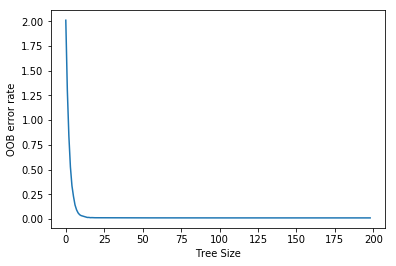

In [111]:
plt.xlabel('Tree Size')
plt.ylabel('OOB error rate')
plt.plot(np.subtract(1,np.array(oob)))

In [41]:
print(randforest.feature_importances_)

[9.88854277e-01 8.56142046e-04 2.24638379e-03 7.12107558e-03
 9.22121403e-04]


In [46]:
y_pred = randforest.predict(X_val)

In [47]:
y_val_array = np.array(y_val)

In [48]:
y_val_array

array([[0.3214213 ],
       [0.2267048 ],
       [0.97327093],
       ...,
       [0.67696362],
       [0.31875278],
       [0.2470534 ]])

In [49]:
np.sqrt(mean_squared_error(y_pred,y_val_array))

0.03377849123154196

### Random forest on full data

In [55]:
rf_full = rf(bootstrap = False, criterion='mse', max_depth = 10)

In [56]:
rf_full.fit(train_x, train_y)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred_full = rf_full.predict(train_x)

In [58]:
np.sqrt(mean_squared_error(y_pred_full, train_y))

0.02708621216788669

### Cross validation for finding best combination of parameters

In [61]:
param_grid = {
                'n_estimators': [5, 10, 15, 20],
                'max_depth': [2, 5, 7, 9],
                'bootstrap' : [True, False]
             }

In [62]:
randomforestCV = rf()

In [64]:
from sklearn.grid_search import GridSearchCV

grid_rf = GridSearchCV(randomforestCV, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [65]:
grid_rf.best_params_

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 20}

### Fitting random forest model with the best parameters obtained using cross validation 
(applied on splitted data)

In [68]:
new_rf = rf(bootstrap = True, n_estimators = 20, max_depth = 9)

In [69]:
new_rf.fit(X_train, y_train)

C:\Users\Vedant Mehta\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
y_rf_pred_train = new_rf.predict(X_train)

In [73]:
np.sqrt(mean_squared_error(y_rf_pred_train, y_train))

0.026545856706394956

In [70]:
y_rf_pred = new_rf.predict(X_val)

In [71]:
np.sqrt(mean_squared_error(y_rf_pred, y_val))

0.030797827371999913

# ---------------------

# KANCHAN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("C:/Users/Kanchan/Documents/Spring 2018/619/Project/TrainingData_2015.csv")

In [3]:
train_x = train.iloc[:, 1:6]
train_y = train.iloc[:, -1]
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.3)

In [16]:
list(train.columns)

['Time',
 'WindSpeed ',
 'WindSpeed_Std ',
 'WindDirection',
 'Temperature',
 'Intensity',
 'Power_Avg']

In [3]:
df.head(train)

,Time,WindSpeed,WindSpeed_Std,WindDirection,Temperature,Intensity,Power_Avg
0,1/1/2015 0:10,8.025,0.504,327.346,1.170,0.062804,0.803112
1,1/1/2015 0:20,8.946,0.540,330.198,0.875,0.060362,0.969471
2,1/1/2015 0:30,9.147,0.480,334.323,0.876,0.052476,1.000000
3,1/1/2015 0:40,8.561,0.673,335.525,0.755,0.078612,0.896077
4,1/1/2015 0:50,7.578,0.384,334.049,0.531,0.050673,0.669709


In [5]:
train['Power_Avg'].describe()

count    30997.000000
mean         0.410400
std          0.277098
min          0.091267
25%          0.181812
50%          0.319342
75%          0.581455
max          1.000000
Name: Power_Avg, dtype: float64

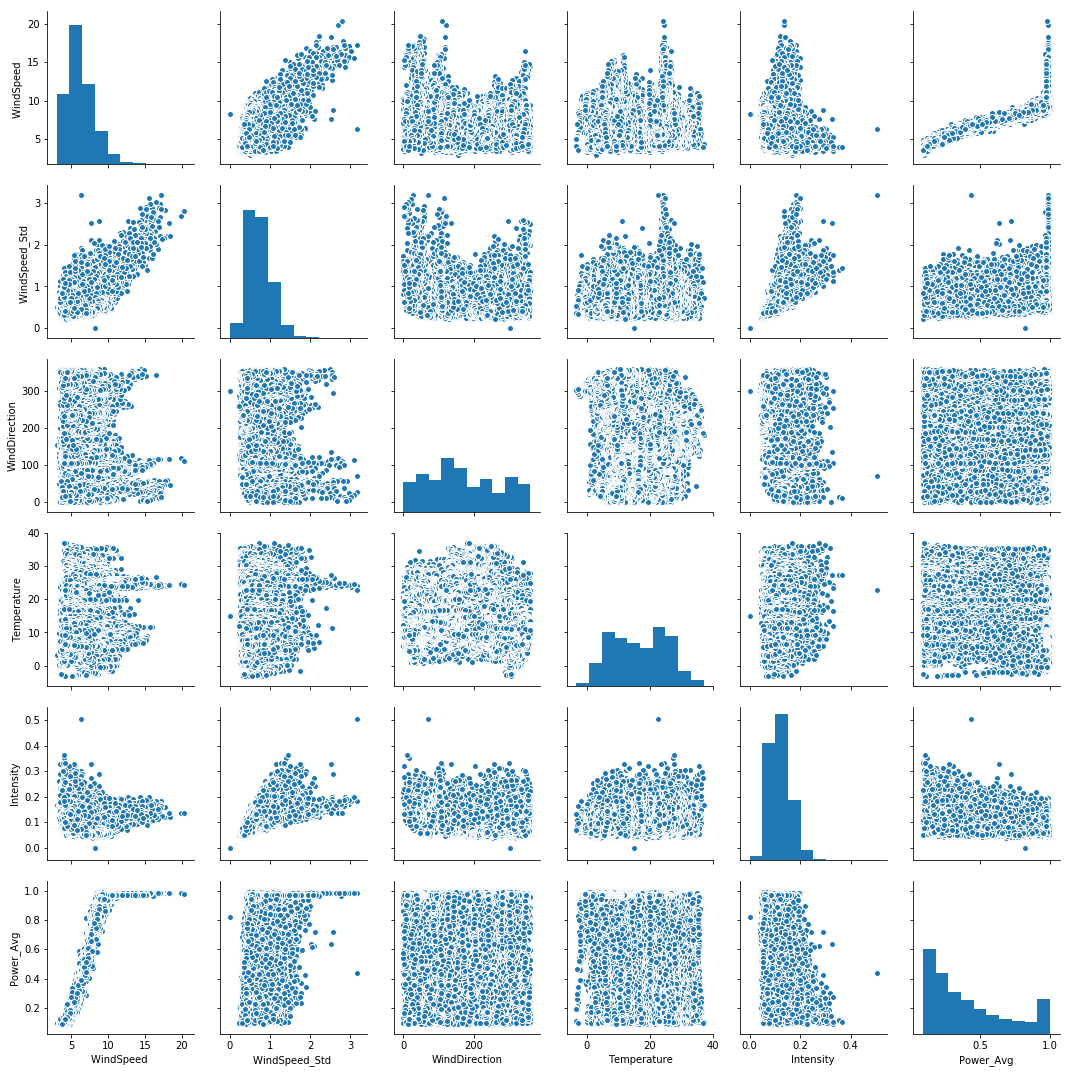

In [5]:
sns.pairplot(train);

It looks like there is no specific distribution of most of the features over Power_avg except WindSpeed. We should explore more to get insights.

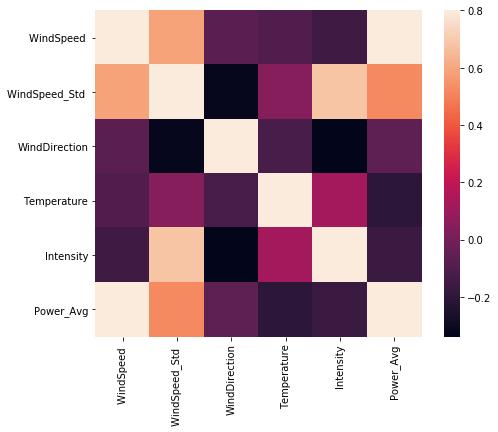

In [9]:
#corelation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

Highly corelated featurs:
Windspeed and PowerAvg
Windspeed_Std and Intensity

Medium corelated:
Windspeed_Std and PowerAvg
Windspeed_Std and Temperature

Less corelated:
PowerAvg and WindDirection
PowerAvg and Temperature
PowerAvg and Intensity


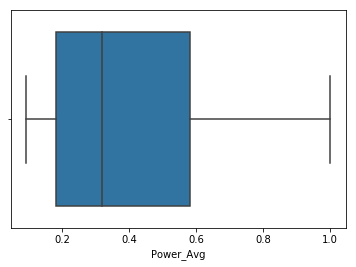

In [10]:
sns.boxplot(train['Power_Avg']) 

C:\Users\Kanchan\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Kanchan\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'lw'
  s)


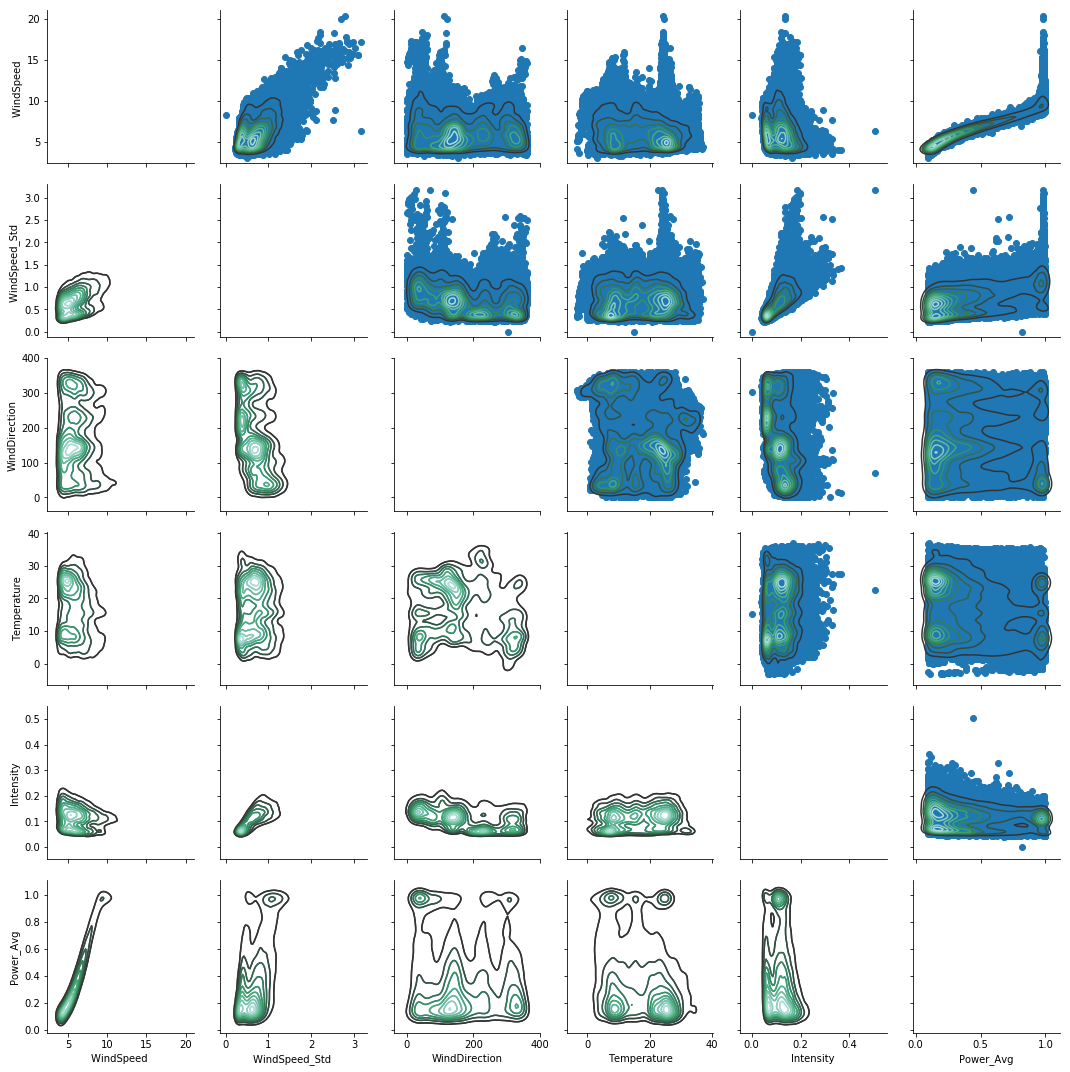

In [7]:
g = sns.PairGrid(train)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_offdiag(sns.kdeplot, lw = 3);

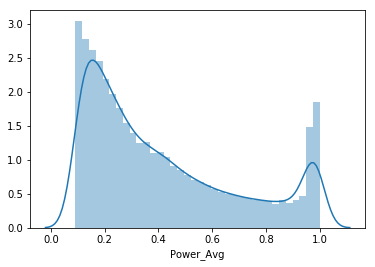

In [6]:
sns.distplot(train['Power_Avg']);

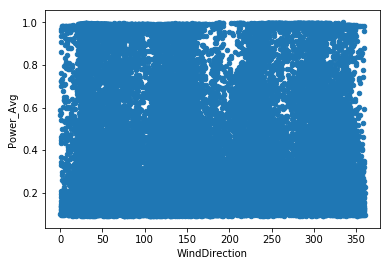

In [55]:
data = pd.concat([train['Power_Avg'], train['WindDirection']], axis=1)
data.plot.scatter(x='WindDirection', y='Power_Avg');

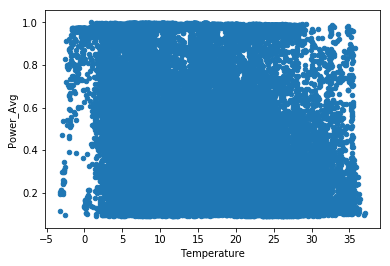

In [56]:
data = pd.concat([train['Power_Avg'], train['Temperature']], axis=1)
data.plot.scatter(x='Temperature', y='Power_Avg');

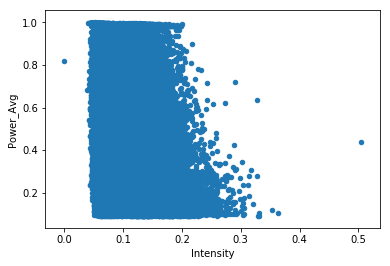

In [57]:
data = pd.concat([train['Power_Avg'], train['Intensity']], axis=1)
data.plot.scatter(x='Intensity', y='Power_Avg');

### Linear Regression

In [58]:
linreg = LinearRegression(normalize=True)
linreg.fit(train_x, train_y)
train_y_pred = linreg.predict(train_x)

In [59]:
##R2 value
linreg.score(train_x, train_y)

0.9164307875990415

In [60]:
##mean squared error
np.sqrt(mean_squared_error(train_y, train_y_pred))

0.08010306939226232

In [61]:
linreg.coef_

array([ 1.82064197e-01, -3.56488213e-01, -5.85811129e-05, -3.34919100e-03,
        1.99058927e+00])

In [62]:
linreg.intercept_

-0.6450313513856065

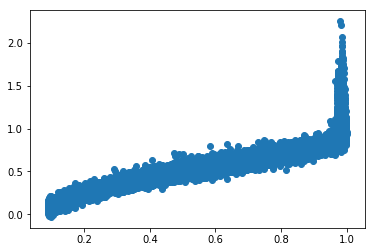

In [63]:
plt.scatter(train_y, train_y_pred);

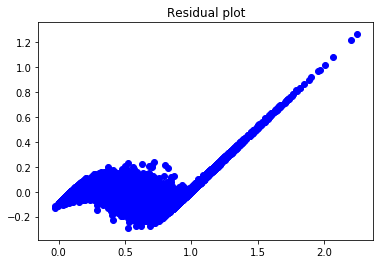

In [64]:
plt.scatter(train_y_pred, train_y_pred - train_y, c = 'b')
plt.title("Residual plot");

### Lasso Regression

In [65]:
lassoreg = LassoCV(cv=10)
lassoreg.fit(train_x, train_y)
train_y_pred = lassoreg.predict(train_x)
lassoreg.score(train_x, train_y)

0.909168054014487

In [71]:
np.sqrt(mean_squared_error(train_y, train_y_pred))

0.08351131310388306

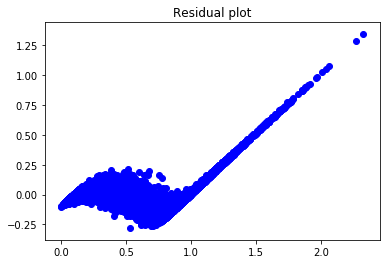

In [72]:
plt.scatter(train_y_pred, train_y_pred - train_y, c = 'b')
plt.title("Residual plot");

### SVM

In [75]:
svm1 = svm.SVR(kernel = "rbf")
svm1.fit(train_x, train_y)
svm1.score(train_x, train_y)

0.9393899221132018

In [76]:
pred_y_svm1 = svm1.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_svm1))

0.0682179122670529

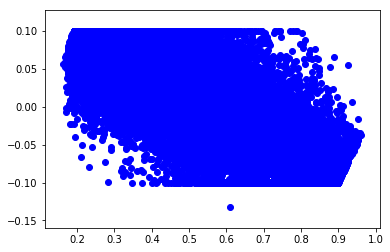

In [77]:
plt.scatter(pred_y_svm1, pred_y_svm1 - train_y, c = 'b');

In [80]:
svm2 = svm.SVR(C = 0.5, kernel = "rbf")
svm2.fit(train_x, train_y)
svm2.score(train_x, train_y)

0.9393812307697825

In [81]:
pred_y_svm2 = svm2.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_svm2))

0.06822280323625914

In [84]:
svm3 = svm.SVR(C = 1.5, kernel = "rbf")
svm3.fit(train_x, train_y)
svm3.score(train_x, train_y)

0.939391178138491

In [85]:
pred_y_svm3 = svm3.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_svm3))

0.0682172054220043

In [86]:
svm4 = svm.SVR(C = 5, kernel = "rbf")
svm4.fit(train_x, train_y)
svm4.score(train_x, train_y)

0.9393919527073197

In [87]:
pred_y_svm4 = svm4.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_svm4))

0.06821676951937419

### Neural Network

In [89]:
neuralnet1 = MLPRegressor()
neuralnet1.fit(train_x, train_y)
pred_y_neural1 = neuralnet1.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_neural1))

0.07499959574394968

In [102]:
neuralnet2 = MLPRegressor(hidden_layer_sizes=(800, ), activation='tanh')
neuralnet2.fit(train_x, train_y)
pred_y_neural2 = neuralnet2.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y_neural2))

0.062481669392755554

### Decision Tree 

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
#Whole data
dec_tree = DecisionTreeRegressor()
dec_tree.fit(train_x, train_y)
pred_y = dec_tree.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

7.588499784088218e-05

In [6]:
#Sample Training set
dec_tree.fit(x_train, y_train)
y_train_pred = dec_tree.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_train_pred))

7.45993211709711e-05

In [7]:
#validation set
y_val_pred = dec_tree.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_val_pred))

0.04018075849872366

In [8]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [11]:
dot_data = StringIO()
export_graphviz(dec_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [9]:
import graphviz 
dot_data = tree.export_graphviz(dec_tree, out_file = None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### Decision Tree Regression with AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostRegressor

In [25]:
#Whole data
adaboost = AdaBoostRegressor()
adaboost.fit(train_x, train_y)
pred_y = adaboost.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.04767361812546491

In [26]:
#Sample Training set
adaboost.fit(x_train, y_train)
y_train_pred = adaboost.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.04444448804153382

In [27]:
#Validation set
y_val_pred = adaboost.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_val_pred))

0.045179442820327584

# ---------------------

#### Data including all variables

In [70]:
#Split train data
train_x = train.iloc[:, 1:6]
train_y = train.iloc[:, -1]
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.3)

In [68]:
#Data for 1st six months
train1 = train.iloc[0:16465, 1:7]
train1_x = train1.iloc[:, 0:5]
train1_y = train1.iloc[:, -1]

#### Data including 2 variables

In [71]:
#new train data
xtrain_new = x_train.iloc[:, [0,4]]
xval_new = x_val.iloc[:, [0,4]]

In [69]:
#new data for 1st six months
train1_xnew = train1_x.iloc[:, [0,4]]

### Linear Regression

In [72]:
#training set
linreg = LinearRegression(normalize=True)
linreg.fit(x_train, y_train)
pred_train_linreg = linreg.predict(x_train)

In [73]:
np.sqrt(mean_squared_error(y_train, pred_train_linreg))

0.07982418420921134

In [76]:
#validation set
pred_val_linreg = linreg.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_linreg))

0.08077690489502216

In [77]:
#first six months
pred_train1_linreg = linreg.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_linreg))

0.07026181185862825

In [78]:
#fitting on new train data
linreg = LinearRegression(normalize=True)
linreg.fit(xtrain_new, y_train)
pred_train_linreg = linreg.predict(xtrain_new)
np.sqrt(mean_squared_error(y_train, pred_train_linreg))

0.08853195747595632

In [79]:
#new validation set
pred_val_linreg = linreg.predict(xval_new)
np.sqrt(mean_squared_error(y_val, pred_val_linreg))

0.08951981456103705

### Lasso Regression

In [80]:
#training set
lassoreg = LassoCV(cv=10)
lassoreg.fit(x_train, y_train)
pred_train_lasso = lassoreg.predict(x_train)
lassoreg.score(x_train, y_train)

0.9099613817208699

In [81]:
np.sqrt(mean_squared_error(y_train, pred_train_lasso))

0.08313711121665884

In [82]:
#validation set
pred_val_lasso = lassoreg.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_lasso))

0.08458570411436088

In [83]:
#first six months
pred_train1_lasso = lassoreg.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_lasso))

0.07140952373077941

### SVM

In [86]:
#train data
svm1 = svm.SVR(kernel = "rbf")
svm1.fit(x_train, y_train)
svm1.score(x_train, y_train)

0.9362383352259028

In [87]:
pred_train_svm = svm1.predict(x_train)
np.sqrt(mean_squared_error(y_train, pred_train_svm))

0.06996169822899116

In [88]:
#validation set
pred_val_svm = svm1.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_svm))

0.0857912475426514

In [89]:
#first six months
pred_train1_svm = svm1.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_svm))

0.07255502707564832

In [110]:
#fitting on new train data
svm1 = svm.SVR(kernel = "rbf")
svm1.fit(xtrain_new, y_train)
pred_train_svm = svm1.predict(xtrain_new)
np.sqrt(mean_squared_error(y_train, pred_train_svm))

0.04749718589814433

In [92]:
#new validation set
pred_val_svm = svm1.predict(xval_new)
np.sqrt(mean_squared_error(y_val, pred_val_svm))

0.04704887744246144

In [104]:
#first six months
pred_train1_svm = svm1.predict(train1_xnew)
np.sqrt(mean_squared_error(train1_y, pred_train1_svm))

0.04764370509569707

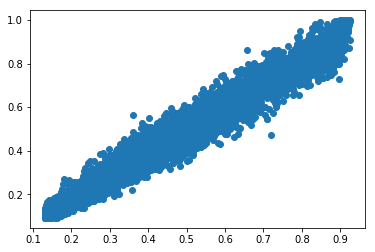

In [137]:
plt.plot(pred_val_svm, y_val, 'o')

### Decision Tree 

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
#train data
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
pred_train_dt = dec_tree.predict(x_train)
np.sqrt(mean_squared_error(y_train, pred_train_dt))

7.373983729107991e-05

In [95]:
#validation set
pred_val_dt = dec_tree.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_dt))

0.03992321356307504

In [96]:
#first six months
pred_train1_dt = dec_tree.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_dt))

0.021504170343833902

In [111]:
#fitting on new train data
dec_tree = DecisionTreeRegressor()
dec_tree.fit(xtrain_new, y_train)
pred_train_dt = dec_tree.predict(xtrain_new)
np.sqrt(mean_squared_error(y_train, pred_train_dt))

0.0017353831143112235

In [112]:
#new validation set
pred_val_dt = dec_tree.predict(xval_new)
np.sqrt(mean_squared_error(y_val, pred_val_dt))

0.05523465607415941

In [113]:
#first six months
pred_train1_dt = dec_tree.predict(train1_xnew)
np.sqrt(mean_squared_error(train1_y, pred_train1_dt))

0.030898229851100554

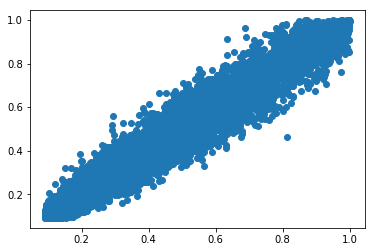

In [138]:
plt.plot(pred_val_dt, y_val, 'o');

### Decision Tree Regression with AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostRegressor

In [98]:
#train data
adaboost = AdaBoostRegressor()
adaboost.fit(x_train, y_train)
pred_train_ada = adaboost.predict(x_train)
np.sqrt(mean_squared_error(y_train, pred_train_ada))

0.04677389941224567

In [99]:
#validation set
pred_val_ada = adaboost.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_ada))

0.047200379565229655

In [100]:
#first six months
pred_train1_ada = adaboost.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_ada))

0.046989881211777676

In [114]:
#new train data
adaboost = AdaBoostRegressor()
adaboost.fit(xtrain_new, y_train)
pred_train_ada = adaboost.predict(xtrain_new)
np.sqrt(mean_squared_error(y_train, pred_train_ada))

0.04953676392680502

In [115]:
#validation set
pred_val_ada = adaboost.predict(xval_new)
np.sqrt(mean_squared_error(y_val, pred_val_ada))

0.04944146101786507

In [116]:
#first six months
pred_train1_ada = adaboost.predict(train1_xnew)
np.sqrt(mean_squared_error(train1_y, pred_train1_ada))

0.051375912535505795

### Random Forest

In [101]:
#training set
from sklearn.ensemble import RandomForestRegressor as rf
rfor = rf(bootstrap = True, n_estimators = 20, max_depth = 9)
rfor.fit(x_train, y_train)
pred_train_rf = rfor.predict(x_train)
np.sqrt(mean_squared_error(y_train, pred_train_rf))

0.026697390431162704

In [102]:
#validation set
pred_val_rf = rfor.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_rf))

0.030678947494740056

In [103]:
#first six months
pred_train1_rf = rfor.predict(train1_x)
np.sqrt(mean_squared_error(train1_y, pred_train1_rf))

0.027190076395280392

In [117]:
#new train data
rfor = rf(bootstrap = True, n_estimators = 20, max_depth = 9)
rfor.fit(xtrain_new, y_train)
pred_train_rf = rfor.predict(xtrain_new)
np.sqrt(mean_squared_error(y_train, pred_train_rf))

0.0356105502024974

In [118]:
#new validation set
pred_val_rf = rfor.predict(xval_new)
np.sqrt(mean_squared_error(y_val, pred_val_rf))

0.039086078016394896

In [119]:
#first six months
pred_train1_rf = rfor.predict(train1_xnew)
np.sqrt(mean_squared_error(train1_y, pred_train1_rf))

0.03890362336710793

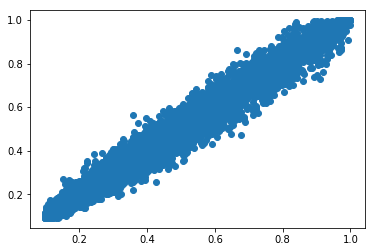

In [139]:
plt.plot(pred_val_rf, y_val, 'o');

### Prediction on test data

In [123]:
test = pd.read_csv("C:/Users/Kanchan/Documents/Spring 2018/619/Project/TestData_2016.csv")

In [128]:
xtest = test.iloc[:, [1,5]]

In [130]:
pred_test_rf = rfor.predict(xtest)

In [134]:
prediction = pd.DataFrame(pred_test_rf, columns=['Power']).to_csv('Predictions.csv')

# ----------------------

In [1]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

C:\Users\Kanchan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
train = pd.read_csv("C:/Users/Kanchan/Documents/Spring 2018/619/Project/TrainingData_2015.csv")
train_x = train.iloc[:, 1:6]
train_y = train.iloc[:, -1]
x_train ,x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3)

### Model 1

In [4]:
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [17]:
estimator.fit(train_x, train_y)
pred_y = estimator.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.046694507907714324

### Model 2

In [21]:
def diff_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [22]:
estimator = KerasRegressor(build_fn=diff_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(train_x, train_y)
pred_y = estimator.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.05144577283321538

### Model 3

In [31]:
def cv_model():
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [32]:
seed = 5
np.random.seed(seed)
estimator = KerasRegressor(build_fn=cv_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, train_x, train_y, cv=kfold)

Results: -0.00 MSE


In [ ]:
seed = 5
np.random.seed(seed)
estimator = KerasRegressor(build_fn=cv_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, train_x, train_y, cv=kfold)

In [34]:
print("Results: %f MSE" % results.mean())

Results: -0.002252 MSE


### Model 4

In [10]:
def model_4():
    model = Sequential()
    model.add(Dense(8, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [37]:
estimator = KerasRegressor(build_fn=model_4, epochs=100, batch_size=5, verbose=0)
estimator.fit(train_x, train_y)
pred_y = estimator.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.03428608824300452

### Model 5

In [39]:
##Whole data
estimator = KerasRegressor(build_fn=model_4, epochs=100, batch_size=100, verbose=0)
estimator.fit(train_x, train_y)
pred_y = estimator.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.03389712876197508

In [11]:
##Training error
estimator = KerasRegressor(build_fn=model_4, epochs=100, batch_size=100, verbose=0)
estimator.fit(x_train, y_train)
y_train_pred = estimator.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.03999938594701597

In [12]:
##Validation error
y_val_pred = estimator.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_val_pred))

0.04048927262385686

### Model 6

In [55]:
estimator = KerasRegressor(build_fn=model_4, epochs=500, batch_size=100, verbose=0)
estimator.fit(train_x, train_y)
pred_y = estimator.predict(train_x)
np.sqrt(mean_squared_error(train_y, pred_y))

0.03424076270228757